In [1]:
import os,sys
import datetime
import scanpy as sc
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
import json

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib import cm
from matplotlib.lines import Line2D
from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, HPacker, VPacker
import json

In [4]:
# add the utility function folder to PATH
sys.path.append(os.path.abspath("utility_functions_190403_12h24/"))

from rz_import_statements import *
import rz_functions as rz
import rz_utility_spring as srz

python version: 3.8.12


## Loading data

In [5]:
adata = sc.read_h5ad('backups_JZ_2022/clean_kidney_304_15tr_25c_batch_corrected_50236x2000_220315_12h14.h5ad') 

In [6]:
#taking all the genes, not only variable ones
adata = adata.raw.to_adata()

In [7]:
adata

AnnData object with n_obs × n_vars = 50236 × 33538
    obs: 'library', 'total_counts', 'pct_counts_mito', 'library2', 'sample', 'patient', 'pT stage', 'seq_date', 'beads', 'operation', 'sex', 'tumor size, mm', 'age', 'tissue', 'necrosis', 'doublet_score', 'potential_doublet', 'top3pct_dbtl_score', 'top5pct_dbtl_score', 'top10pct_dbtl_score', 'closest_JZ_kidney', 'closest_JZ_kidney_hvg', 'removed_as_RBC', 'removed_as_dblt1', 'removed_as_dblt2', 'n_counts', 'no_dblt_no_rbc'
    uns: 'X_lin_cptt', 'X_log_z', 'beads_colors', 'draw_graph', 'neighbors', 'pca', 'sample_colors', 'seq_date_colors', 'tissue_colors', 'umap'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_pca_harmony', 'X_umap'

In [8]:
#load latest obs
filename = 'backups_JZ_2022/corrected_obs_info_50236x32_221012_12h04.npz'
encoding = 'latin1'

with np.load(filename,encoding=encoding, allow_pickle = True) as f:
    obs = pd.DataFrame(**f)
adata.obs=obs
adata.obs

library total_counts pct_counts_mito library2 sample patient  \
2              N14          449        0.668151     T2_1     T2      P2   
19             N14          449         4.23163     T2_1     T2      P2   
363            N14         1229         10.6591     T2_1     T2      P2   
433            N14          432         6.94444     T2_1     T2      P2   
444            N14          502         4.98008     T2_1     T2      P2   
...            ...          ...             ...      ...    ...     ...   
4865536  Tumor0228          683         9.37042   T4_old     T4      P4   
4865584  Tumor0228         1473         6.51731   T4_old     T4      P4   
4865642  Tumor0228          498         9.43775   T4_old     T4      P4   
4865726  Tumor0228          421         19.2399   T4_old     T4      P4   
4866011  Tumor0228          763         3.80079   T4_old     T4      P4   

        pT stage  seq_date beads operation  ... n_counts no_dblt_no_rbc  \
2           pT3a  20_11_12   old      Open  ...      449           True   
19          pT3a  20_11_12   old      Open  ...      449           True   
363         pT3a  20_11_12   old      Open  ...     1229           True   
433         pT3a  20_11_12   old      Open  ...      432           True   
444         pT3a  20_11_12   old      Open  ...      502           True   
...          ...       ...   ...       ...  ...      ...            ...   
4865536     pT3a       old   old      Open  ...      683           True   
4865584     pT3a       old   old      Open  ...     1473           True   
4865642     pT3a       old   old      Open  ...      498           True   
4865726     pT3a       old   old      Open  ...      421           True   
4866011     pT3a       old   old      Open  ...      763           True   

        sp_cl_43               cell_type broad_cell_type    color  \
2             40                   TAM 4          Immune  #9a5ce0   
19            37                   TAM 3          Immune  #943886   
363           22           Tumor cells 2           Tumor  #b06c6c   
433           27           Tumor cells 3           Tumor  #db2f2c   
444           28     Tumor vasculature 4     Endothelial  #a35927   
...          ...                     ...             ...      ...   
4865536       30                   TAM 2          Immune  #532b6b   
4865584       30                   TAM 2          Immune  #532b6b   
4865642       37                   TAM 3          Immune  #943886   
4865726       27           Tumor cells 3           Tumor  #db2f2c   
4866011       42  Resting/memory T cells          Immune  #4f9e58   

             cell_group stage_color patient_color group_color  
2         Myeloid cells     #8c1a1a       #e87f7f     #85619c  
19        Myeloid cells     #8c1a1a       #e87f7f     #85619c  
363         Tumor cells     #8c1a1a       #e87f7f     #db2f2c  
433         Tumor cells     #8c1a1a       #e87f7f     #db2f2c  
444         Endothelium     #8c1a1a       #e87f7f     #e07c57  
...                 ...         ...           ...         ...  
4865536   Myeloid cells     #8c1a1a       #70c3d4     #85619c  
4865584   Myeloid cells     #8c1a1a       #70c3d4     #85619c  
4865642   Myeloid cells     #8c1a1a       #70c3d4     #85619c  
4865726     Tumor cells     #8c1a1a       #70c3d4     #db2f2c  
4866011  Lymphoid cells     #8c1a1a       #70c3d4     #4f9e58  

[50236 rows x 32 columns]

In [17]:
sc.pp.normalize_per_cell(adata,counts_per_cell_after=1e4)

In [18]:
adata.X.sum(axis=1)

matrix([[10000.001],
        [10000.   ],
        [10000.001],
        ...,
        [ 9999.999],
        [ 9999.999],
        [ 9999.999]], dtype=float32)

## Making the figures editable in illustrator and setting params


In [9]:
import matplotlib as mpl
mpl.rc('font',family='Arial')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

## Supplementary figure S1a: looking at cell type compositions by patient


In [15]:
adata.obs.keys()

Index(['library', 'total_counts', 'pct_counts_mito', 'library2', 'sample',
       'patient', 'pT stage', 'seq_date', 'beads', 'operation', 'sex',
       'tumor size, mm', 'age', 'tissue', 'necrosis', 'doublet_score',
       'potential_doublet', 'top3pct_dbtl_score', 'top5pct_dbtl_score',
       'top10pct_dbtl_score', 'closest_JZ_kidney', 'closest_JZ_kidney_hvg',
       'n_counts', 'no_dblt_no_rbc', 'sp_cl_43', 'cell_type',
       'broad_cell_type', 'color', 'cell_group', 'stage_color',
       'patient_color', 'group_color'],
      dtype='object')

In [20]:
feature = 'patient'
condition = 'cell_type'




In [21]:
order = list(cell_type_dict_ordered.keys())

In [22]:
category_colors = []
for i in adata.obs[feature].unique():
    category_colors.append(cdd[feature][i])

In [23]:

category_names = adata.obs[feature].unique()
#category_names = cdd[feature].keys()
results = {}
for i in adata.obs[condition].unique():
    percentages = []
    results.update({i : percentages})
    for j in adata.obs[feature].unique():
        cmask = adata.obs[condition].isin([i]).values
        tmask = adata.obs[feature].isin([j]).values
        mask = cmask&tmask
        all_cells_in_sample = sum(cmask)
        percent = (sum(mask)*100)/all_cells_in_sample
        results.get(i).append(percent)
#for reassurance we can print the results
#print(results)

df = pd.DataFrame(results)
df = df[order]
results = df.to_dict(orient = 'list')


In [24]:
 for j in adata.obs[feature].unique():
        print(j)

P2
P3
P4
P6
P5
P7
P8
P9
P1


In [25]:
category_names

['P2', 'P3', 'P4', 'P6', 'P5', 'P7', 'P8', 'P9', 'P1']
Categories (9, object): ['P2', 'P3', 'P4', 'P6', ..., 'P7', 'P8', 'P9', 'P1']

In [26]:
def hbars(results, category_names, savefig='fname.png', mydpi=150):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    
   
    fig, ax = plt.subplots(figsize=(6, 16))
    
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    #removing the frame of the figure
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.9,
                label=colname, color=color)
        xcenters = starts + widths / 2

       # r, g, b, _ = color
        #text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        #for y, (x, c) in enumerate(zip(xcenters, widths)):
         #   ax.text(x, y, str(int(c)), ha='center', va='center',
          #          color=text_color)
   # leg = ax.legend( bbox_to_anchor=(1, 1),
   #           loc='best', fontsize= 14)
   # ax.set_title('Cell type fraction', fontsize = 20)
    
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    plt.tight_layout()
    plt.savefig(outdir+ str(savefig) +'.pdf', transparent=True, dpi=mydpi)

    return fig, ax


(<Figure size 432x1152 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7bb23dd4f0>)

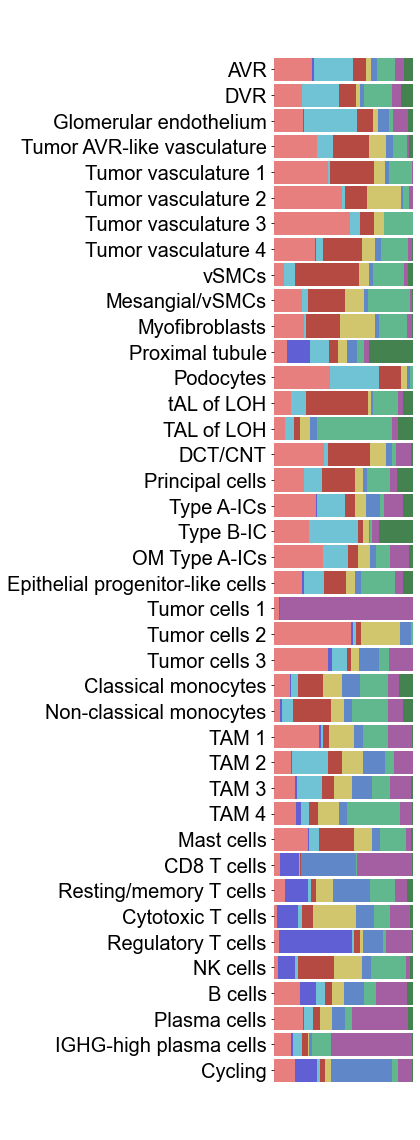

In [29]:

hbars(results, category_names, savefig='cellt_by_patient', mydpi=400)



## looking at cell type compositions by stage


In [30]:
feature = 'pT stage'
condition = 'cell_type'




In [31]:
order = list(cell_type_dict_ordered.keys())

In [32]:
category_colors = []
for i in adata.obs[feature].unique():
    category_colors.append(cdd[feature][i])

In [33]:

category_names = adata.obs[feature].unique()
#category_names = cdd[feature].keys()
results = {}
for i in adata.obs[condition].unique():
    percentages = []
    results.update({i : percentages})
    for j in adata.obs[feature].unique():
        cmask = adata.obs[condition].isin([i]).values
        tmask = adata.obs[feature].isin([j]).values
        mask = cmask&tmask
        all_cells_in_sample = sum(cmask)
        percent = (sum(mask)*100)/all_cells_in_sample
        results.get(i).append(percent)
#for reassurance we can print the results
#print(results)

#corder = ['N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'T3', 'T5', 'T8','T2',  'T4', 'T6', 'T7', 'T9' ]
df = pd.DataFrame(results)
df = df[order]
results = df.to_dict(orient = 'list')


In [34]:
 for j in adata.obs[feature].unique():
        print(j)

pT3a
H_pT1a
H_pT3a
pT1a


In [35]:
category_names

['pT3a', 'H_pT1a', 'H_pT3a', 'pT1a']
Categories (4, object): ['pT3a', 'H_pT1a', 'H_pT3a', 'pT1a']

(<Figure size 432x1152 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7b504f3df0>)

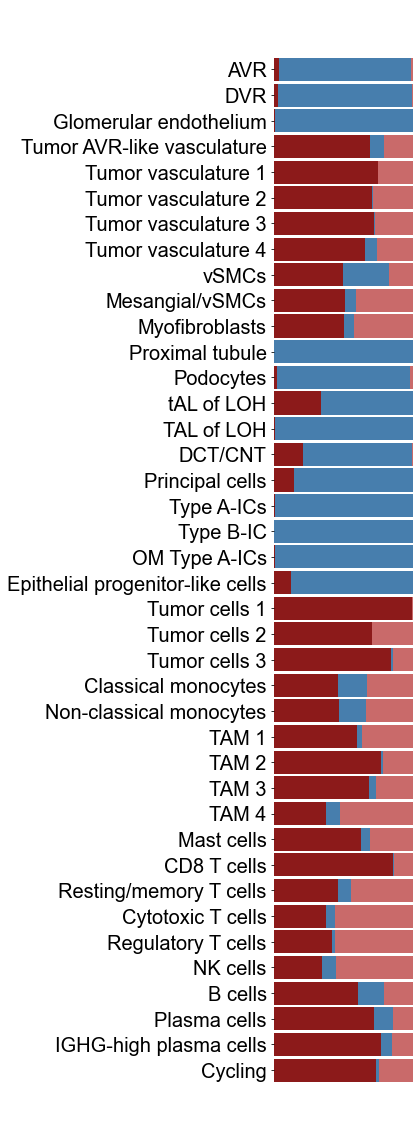

In [49]:

hbars(results, category_names, savefig='cellt_by_stage', mydpi=400)



## Supplementary figure S2a - complement system

In [27]:
#choosing the colormap
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(
    name='cmap', 
    colors=['#D3D3D3', #grey
            #'#ff8080', 
            '#cc0000' #dark-red
           ])

In [90]:
genes = ['C1R', 'C1S', 'C2','C3', 'C1QA', 'C1QB', 'C1QC']

In [91]:
cmask = np.repeat(True,adata.shape[0])

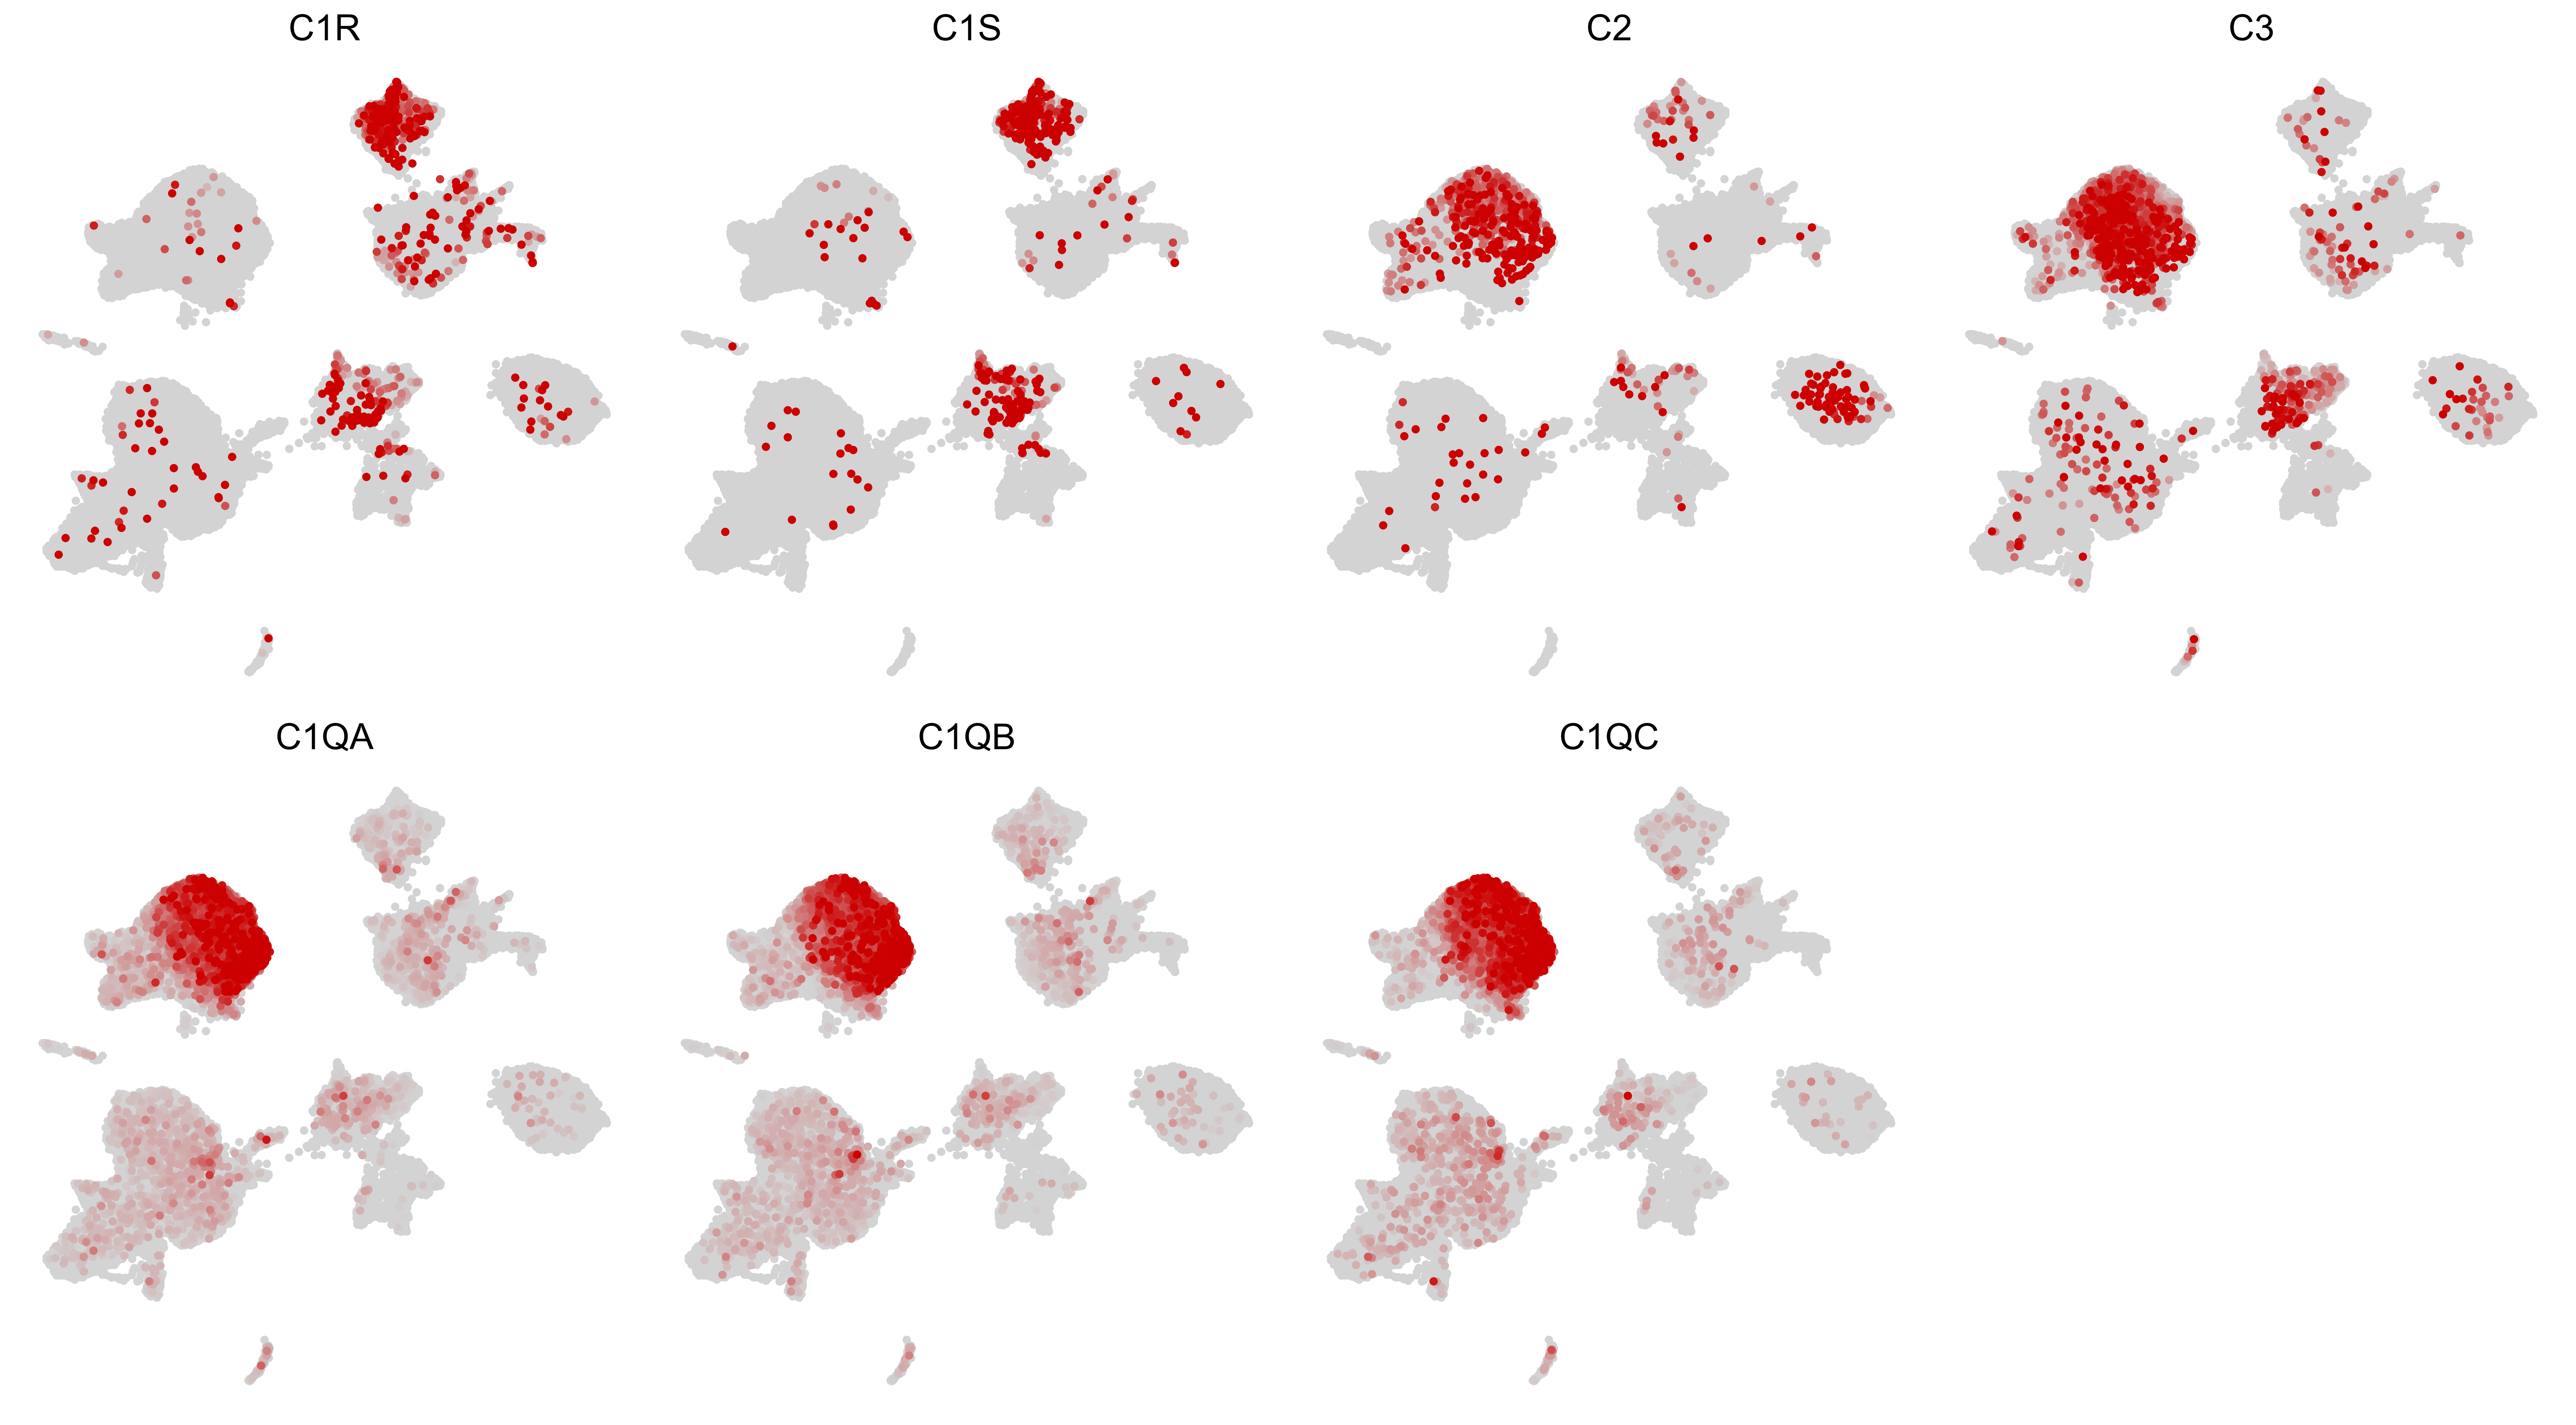

In [96]:
fig = plt.figure(figsize = (18,10), dpi=400)
pctilemax = 99.5

#cmap=sns.color_palette("magma", as_cmap=True)
for i, gene in enumerate(genes):
    gmask = adata.var_names == gene
    color = adata[cmask].X[:,gmask].toarray().T[0]
    vmax = np.percentile(color,pctilemax)

    order = np.argsort(color)

    color = color[order]
    x = adata[cmask].obsm['X_umap'][:, 0][order]
    y = adata[cmask].obsm['X_umap'][:, 1][order]

    
    a = fig.add_subplot(2,4, 1+i, frameon = False)
    b = a.scatter(x, y, c = color, vmax =vmax, s=10, cmap=cmap)
    plt.xticks([])
    plt.yticks([])
    plt.title(str(gene), size = 18)

    plt.tight_layout()
    #a.set_xlim([-5, 3])
    #a.set_ylim([10.5, 18])
    ax.axis('off')
    

#cbar = plt.colorbar(b,orientation='vertical', cmap=cmap)
#cbar.outline.set_visible(False)
#cbar.set_ticks([0,vmax])
#cbar.ax.set_yticklabels(['0th','>%0.1fth'%pctilemax]) 
plt.tight_layout()

plt.savefig('figures_paper/complement_genes_hq.png', transparent=True, bbox_inches='tight')


## UMAPs for main Figure 3a and Supplementary figure S3 - vasculature expression of selected genes


In [10]:
for i in adata.obs['cell_type'].unique():
    print(i)

TAM 4
TAM 3
Tumor cells 2
Tumor cells 3
Tumor vasculature 4
TAM 1
CD8 T cells
TAM 2
Resting/memory T cells
Cytotoxic T cells
Tumor vasculature 2
Tumor vasculature 1
Non-classical monocytes
Mesangial/vSMCs
IGHG-high plasma cells
Mast cells
Tumor vasculature 3
Plasma cells
Tumor AVR-like vasculature
Cycling
vSMCs
NK cells
Classical monocytes
B cells
Myofibroblasts
Regulatory T cells
Tumor cells 1
Proximal tubule
AVR
Epithelial progenitor-like cells
tAL of LOH
Glomerular endothelium
Principal cells
TAL of LOH
DVR
Type A-ICs
OM Type A-ICs
Type B-IC
Podocytes
DCT/CNT


In [11]:

ctypes=['Tumor vasculature 1', 'Tumor vasculature 2', 'Tumor vasculature 3',
        'Tumor vasculature 4', 'Tumor AVR-like vasculature', 'AVR', 'DVR', 'Glomerular endothelium']

grey = '#D3D3D3'


masks = {}
for ctype in ctypes:
    mask = adata.obs['cell_type'].isin([ctype])
    masks[ctype] = mask
    
color_list = []
for i in adata.obs['cell_type']:
    if i in ctypes:
        mask = masks[i]
        color_list.append(adata[mask].obs['color'][0])
    else:
        color_list.append(grey)

In [12]:
cmask = adata.obs['cell_type'].isin(ctypes).values

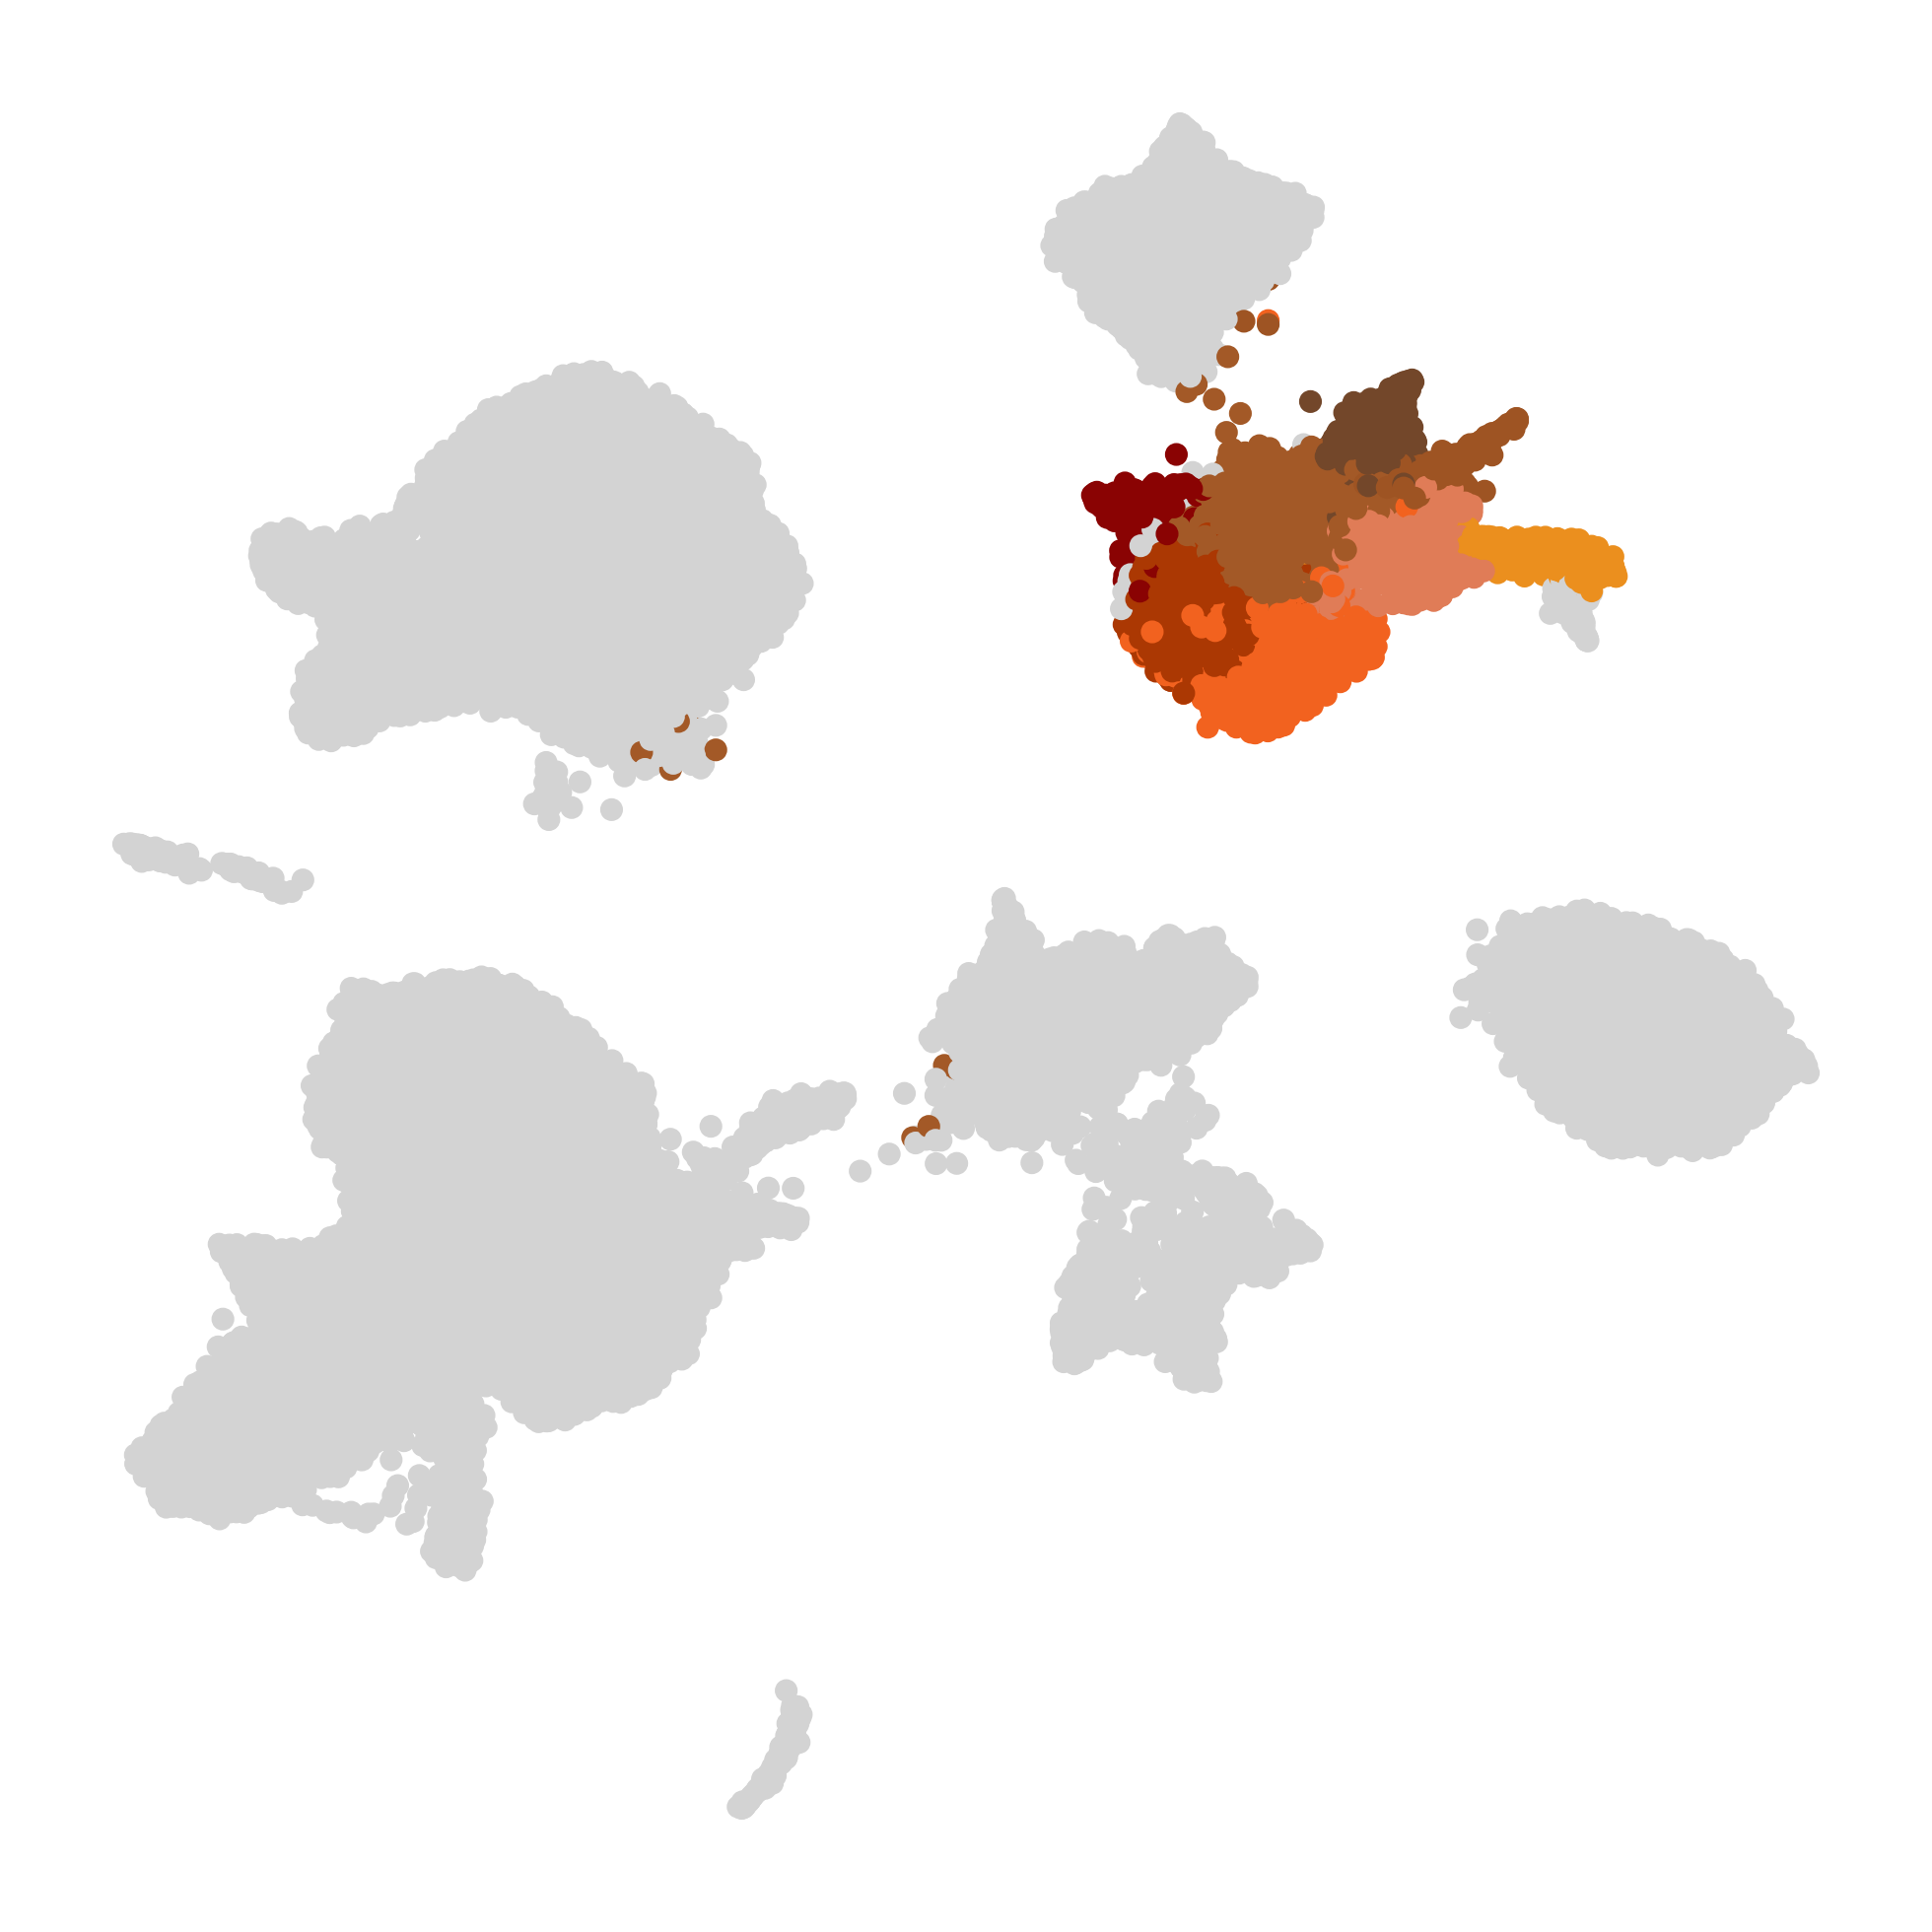

In [16]:
fig, ax = plt.subplots(figsize=(5, 5), frameon=False, dpi=400)
ax1 = plt.scatter(adata.obsm['X_umap'][:, 0], adata.obsm['X_umap'][:, 1], color=color_list,
            s=10) 
ax.axis('off')


#!mkdir figures_paper
plt.tight_layout()
#plt.savefig('figures_paper/vasculature_colored_umap_hq.pdf', transparent=True)

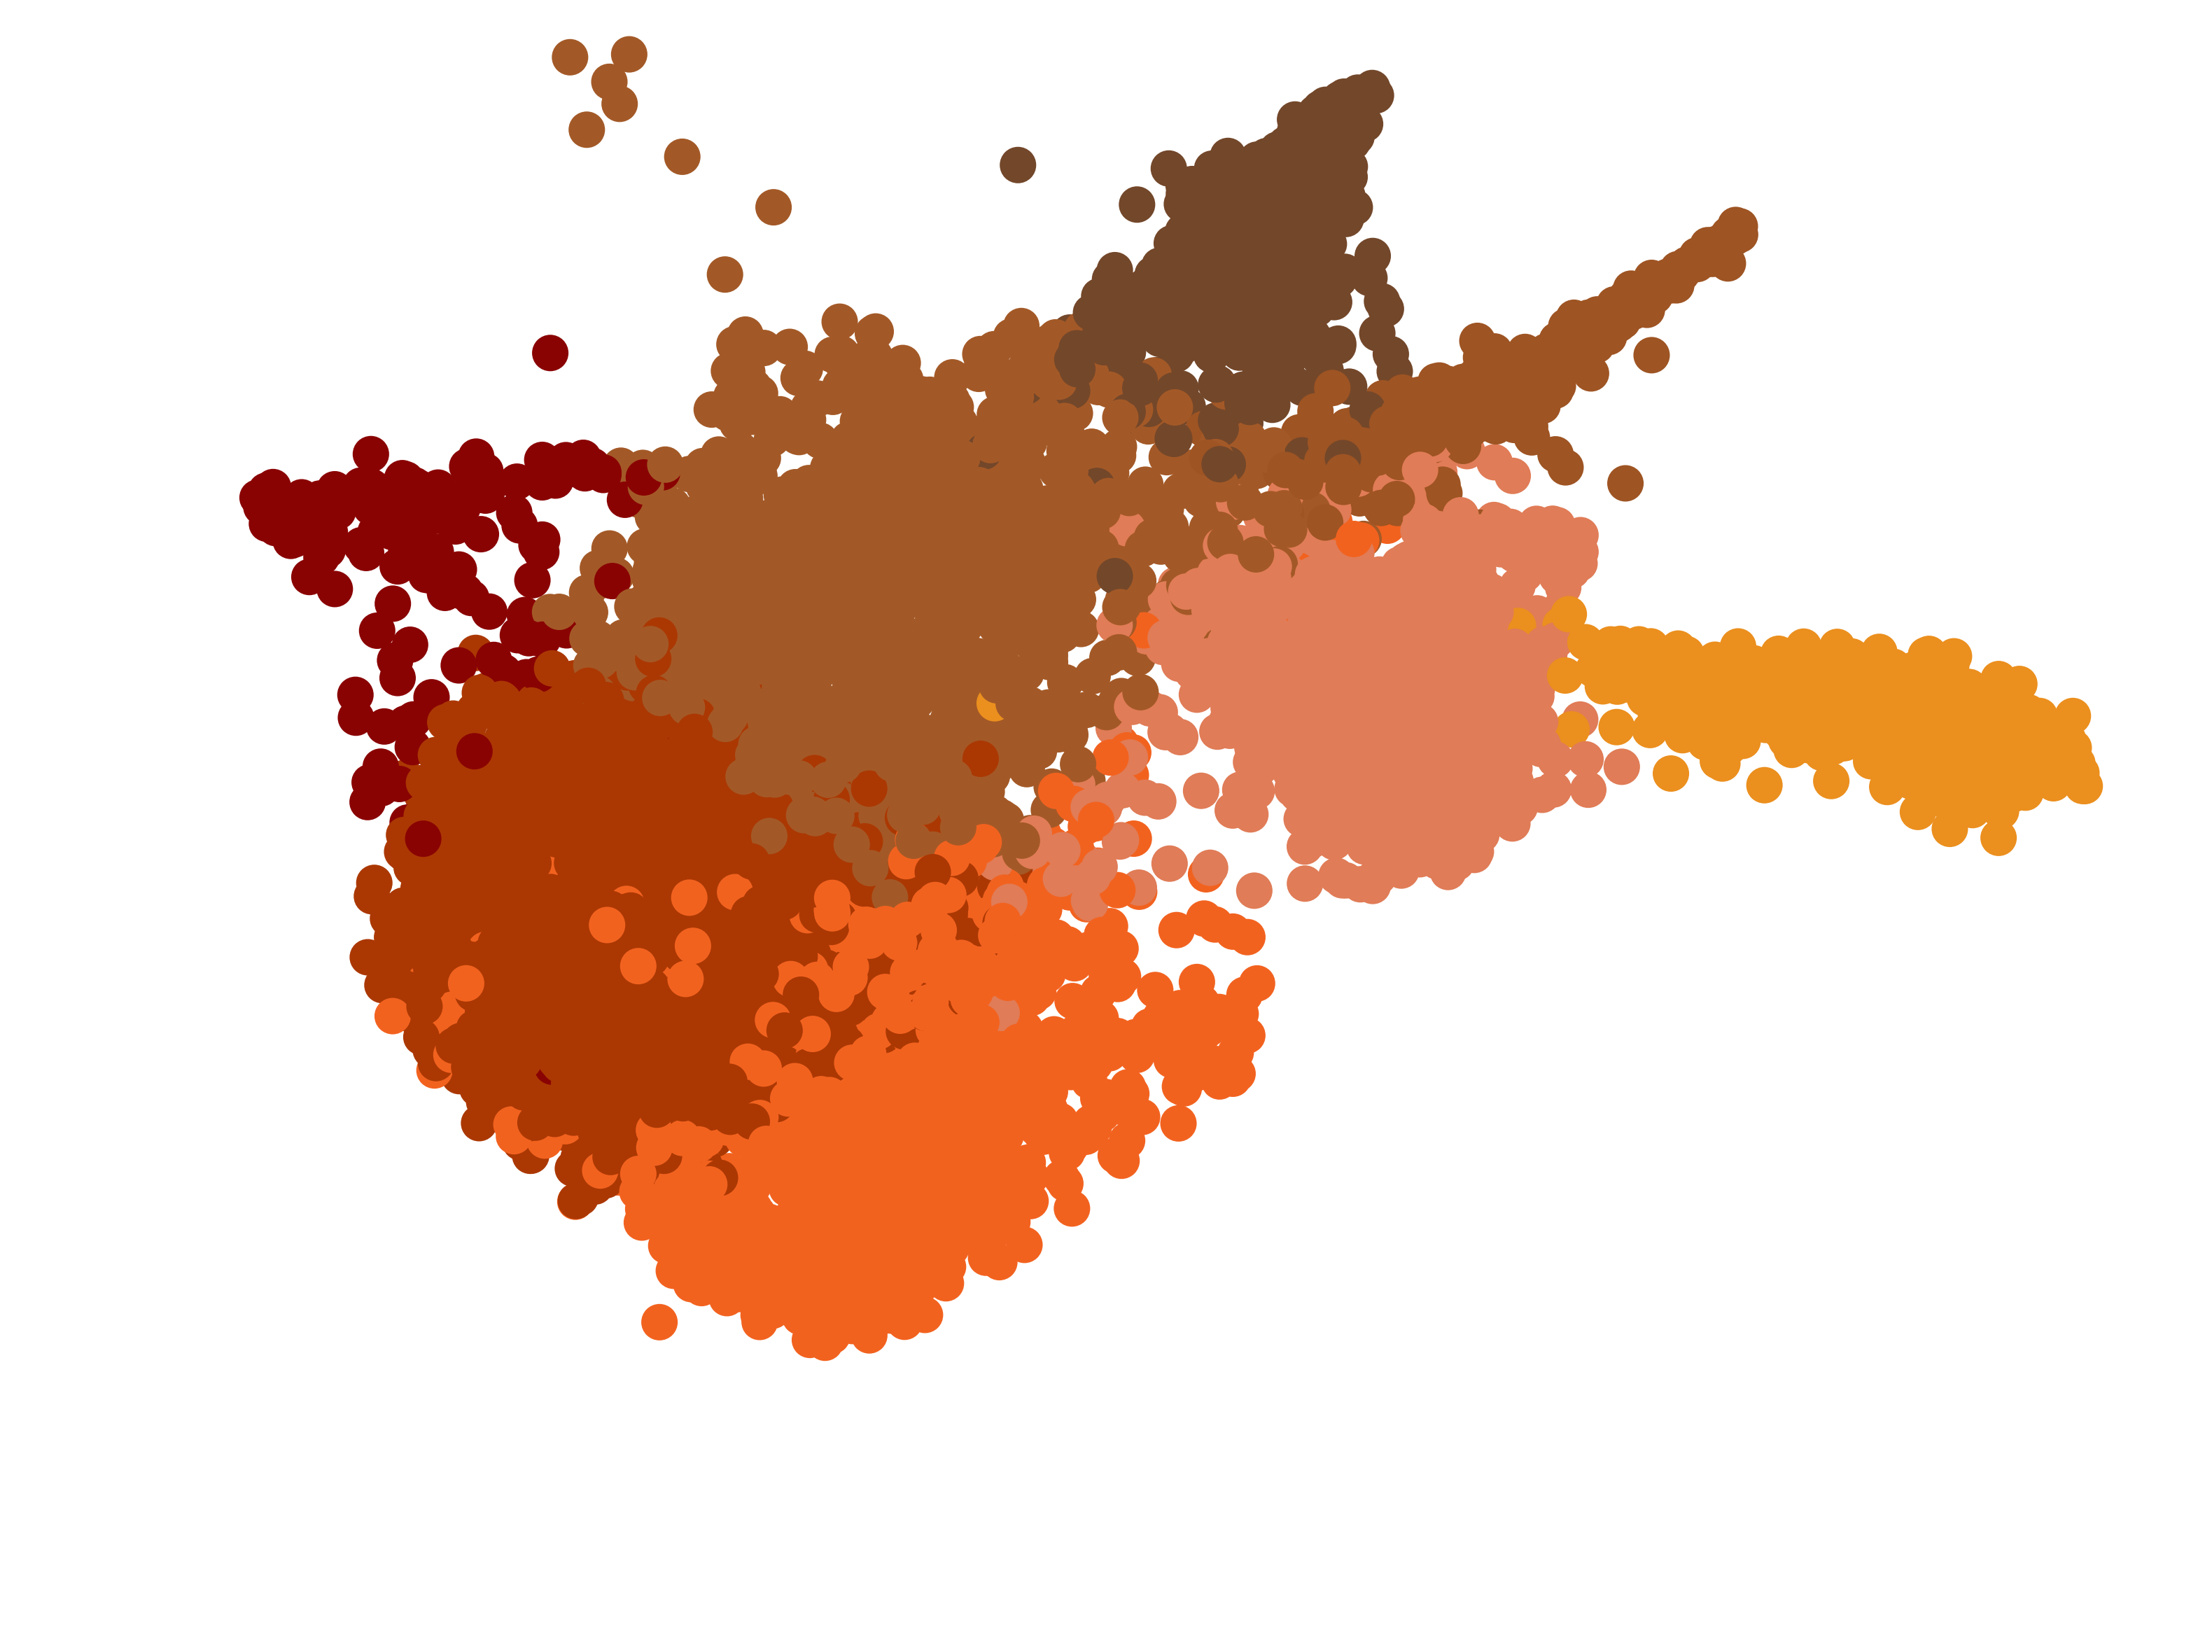

In [17]:
fig, ax = plt.subplots(figsize=(8, 6), frameon=False, dpi=400)
ax1 = plt.scatter(adata[cmask].obsm['X_umap'][:, 0], adata[cmask].obsm['X_umap'][:, 1], color=np.array(color_list)[cmask],
            s=70) 
ax.set_xlim([6, 14.5])
ax.set_ylim([11, 18])
ax.axis('off')
#!mkdir figures_paper
plt.tight_layout()
#plt.savefig('figures_paper/vasculature_colored_only_umap_hq.pdf', transparent=True)

In [13]:
genes = [
'LY6H',
 'PGF',
 'PXDN',
 'LOX', #tip cell markers
 'VIM', 'SPARC', 'SERPINH1', 'SERPINE1', 'NID2', 'MMP2', 'ITGB1', 'IGFBP4', 
             'CTHRC1', 'COL4A1', 'COL4A2', 'PRSS2', 'LGALS1', #EMT enriched
        
 'APOD',
 'CHST1',
 'CLDN5',
 'IL32', #other enriched in TV3 
'HSPG2', 'INHBB', 'SCGB3A1', #metastasis related
'PECAM1', 'ACKR1', 'EDNRB', 'VCAM1'
]

In [14]:
len(genes)


28

In [15]:
gmask = adata.var_names.isin(genes)

In [16]:
#choosing the colormap
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(
    name='cmap', 
    colors=['#D3D3D3', #grey
            #'#ff8080', 
            '#cc0000' #dark-red
           ])

In [18]:
adata.X.sum(axis=1)

matrix([[10000.001],
        [10000.   ],
        [10000.001],
        ...,
        [ 9999.999],
        [ 9999.999],
        [ 9999.999]], dtype=float32)

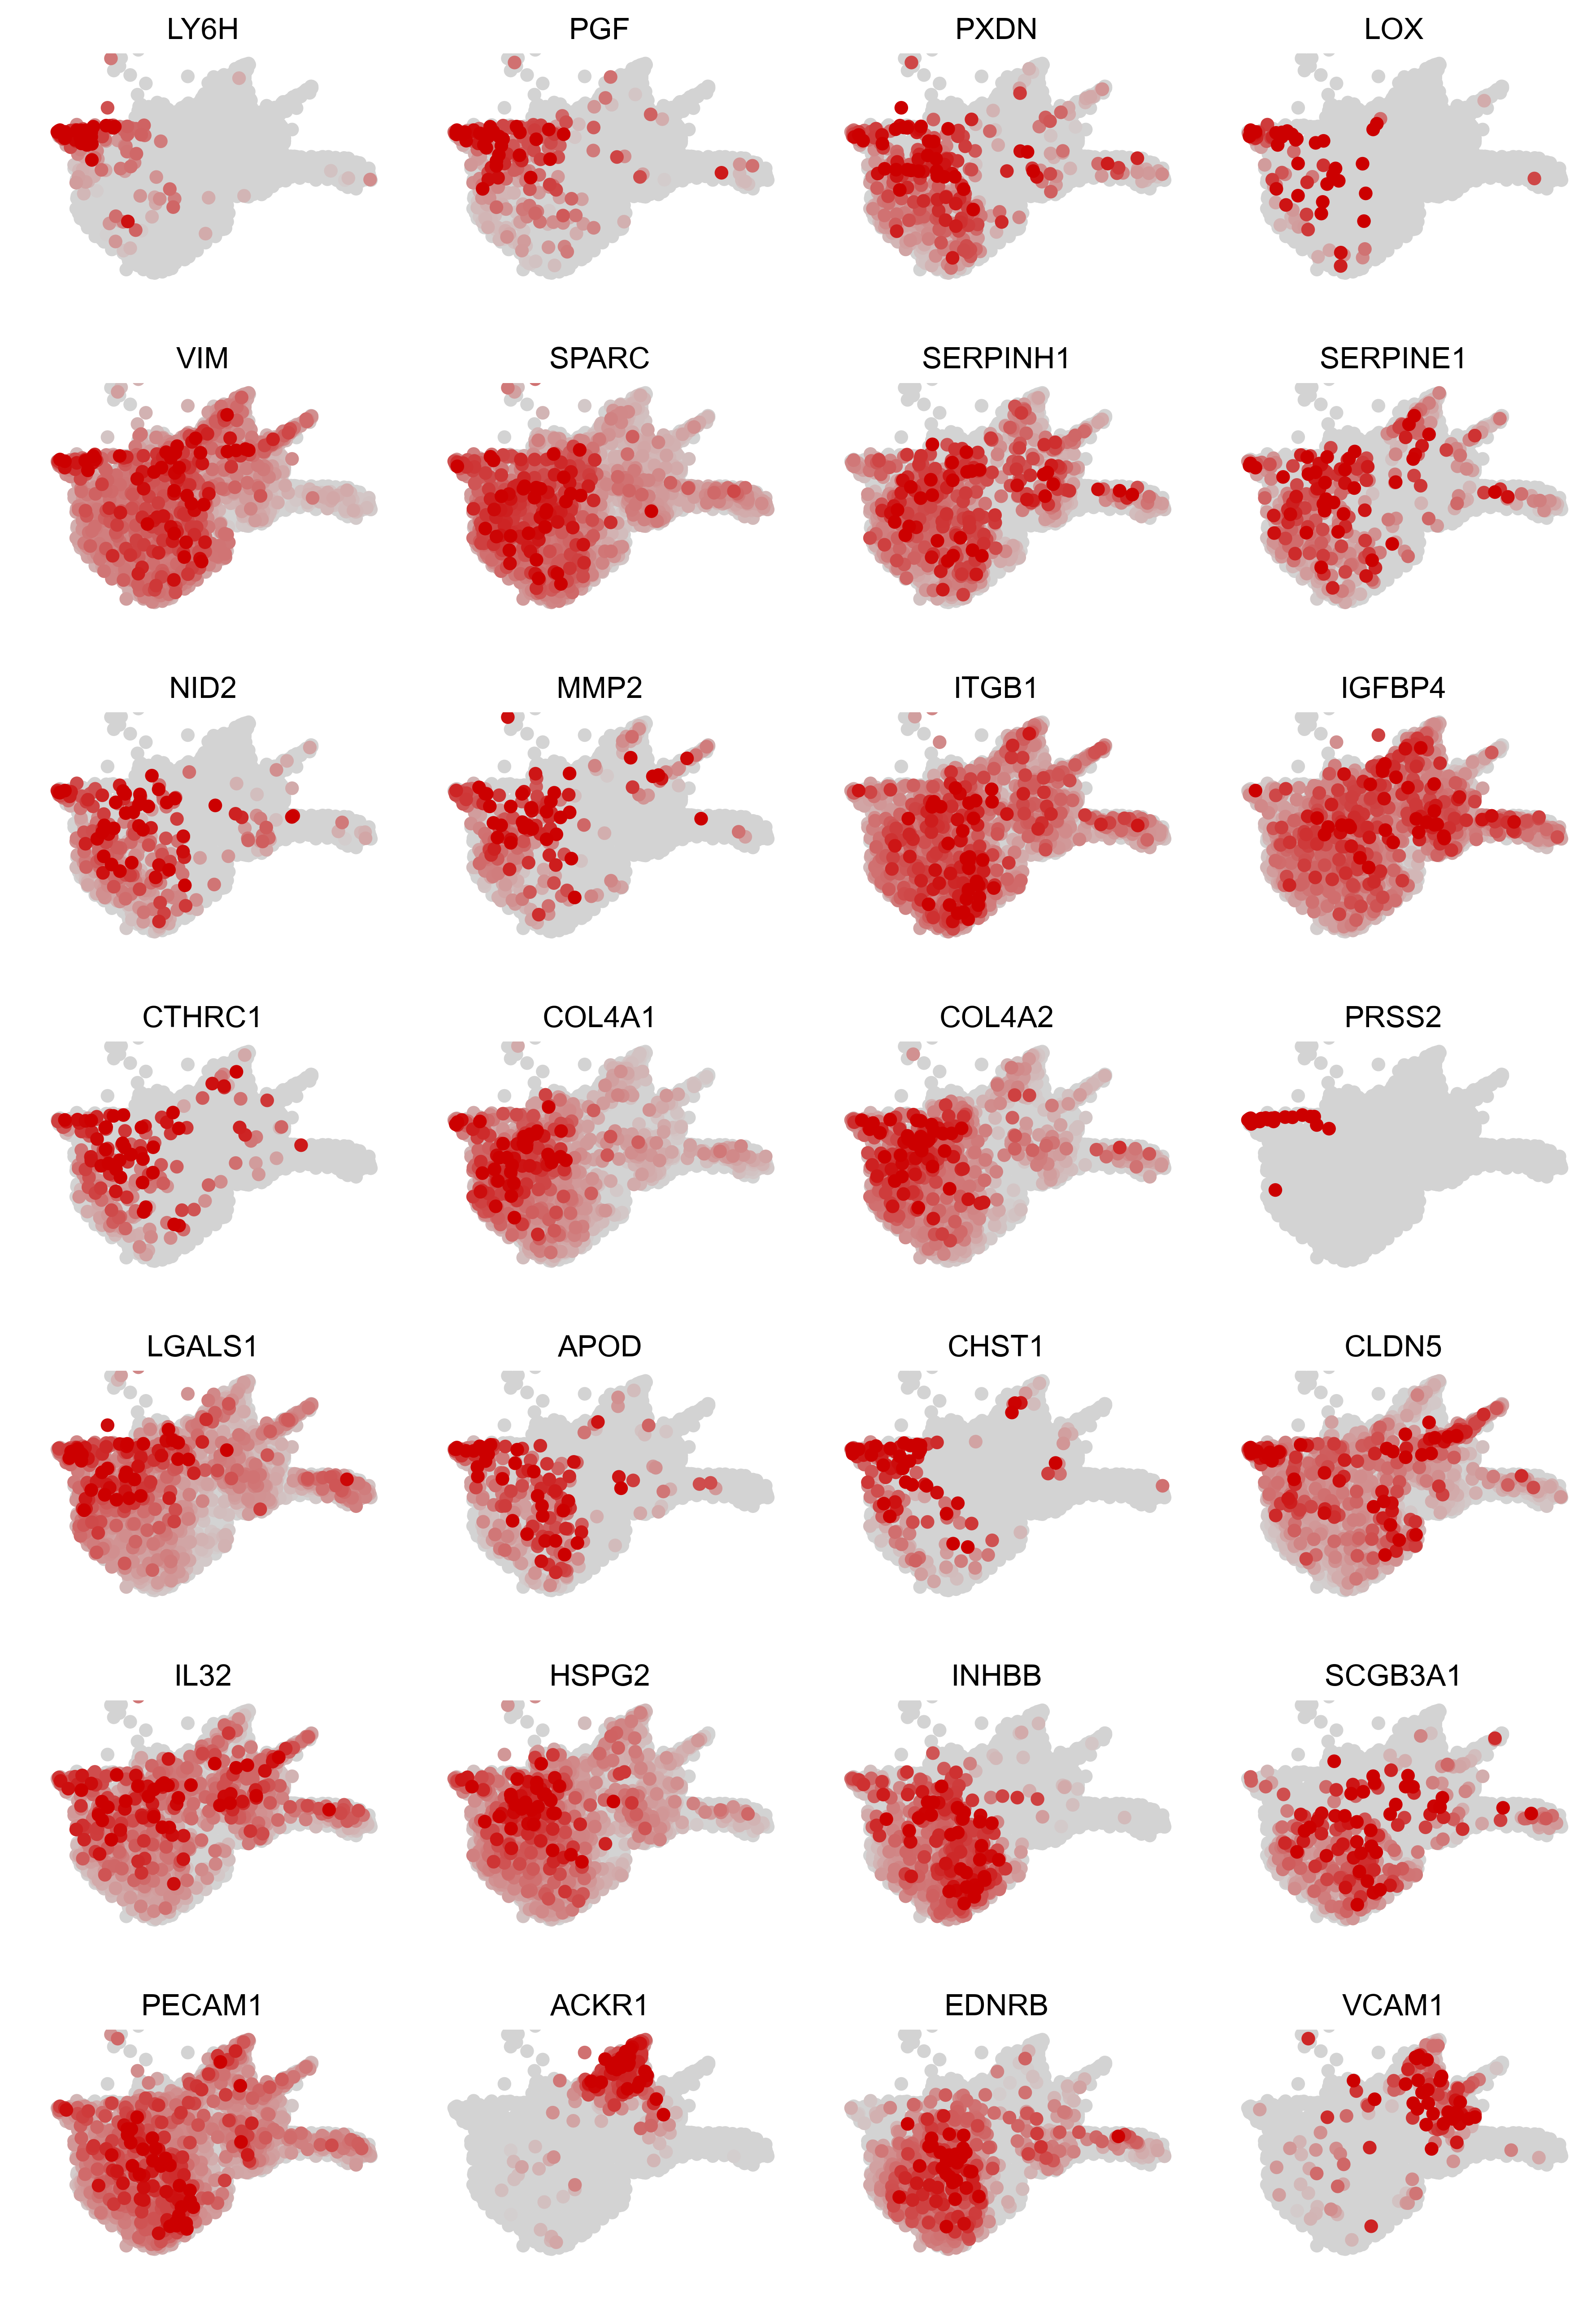

In [19]:
fig = plt.figure(figsize = (9,13), dpi=400)
pctilemax = 99.6

#cmap=sns.color_palette("magma", as_cmap=True)
for i, gene in enumerate(genes):
    gmask = adata.var_names == gene
    color = adata[cmask].X[:,gmask].toarray().T[0]
    vmax = np.percentile(color,pctilemax)

    order = np.argsort(color)

    color = color[order]
    x = adata[cmask].obsm['X_umap'][:, 0][order]
    y = adata[cmask].obsm['X_umap'][:, 1][order]

    
    a = fig.add_subplot(7,4, 1+i, frameon = False)
    b = a.scatter(x, y, c = color, vmax =vmax, s=20, cmap=cmap)
    plt.xticks([])
    plt.yticks([])
    plt.title(str(gene), size = 12)

    plt.tight_layout()
    a.set_xlim([6, 14.5])
    a.set_ylim([11, 18])
    a.axis('off')
    

#caxb = fig.add_axes([0.8, 0.02, 0.02, 0.12])
#cbar = plt.colorbar(b,orientation='vertical', cax=caxb, cmap=cmap)
#cbar.outline.set_visible(False)
#cbar.set_ticks([0,vmax])
#cbar.ax.set_yticklabels(['0th','>%0.1fth'%pctilemax], size=18) 

plt.tight_layout()
plt.savefig('figures_paper/vasculature3_emt_genes_hq.pdf', transparent=True, bbox_inches='tight')
plt.savefig('figures_paper/vasculature3_emt_genes_hq.png', transparent=True, bbox_inches='tight')
